In [438]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import funcs as funcs


def setup_plotting(ticksize=14, fontsize=16, figsize=(16, 9), dpi=150):
    """
    Global plotting setup:
    - Seaborn grey background
    - Custom reversed/de-saturated deep palette
    - Serif + STIX math fonts
    - Grid, linewidths, ticks, figure defaults
    """

    # --- Base style (grey background preserved) ---
    plt.style.use("seaborn-v0_8")
    sns.set()
    sns.set_context("paper", font_scale=1.4)
    sns.set_style("ticks")

    # --- Color palette ---
    #colors = sns.color_palette("deep", 10, desat=0.8)
    #colors = sns.color_palette("husl", 10)
    #colors = sns.color_palette("tab10", 10)
    colors = sns.color_palette("Set1", 10)
    #colors = colors[::-1]
    #colors.pop(2)
    sns.set_palette(colors)

    # --- Fonts ---
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman"] + plt.rcParams["font.serif"],
        "mathtext.fontset": "stix",
        "font.size": fontsize,
        "xtick.labelsize": ticksize,
        "ytick.labelsize": ticksize,
    })

    # --- Axes & ticks ---
    plt.rcParams.update({
        "axes.linewidth": 2.25,
        "axes.formatter.limits": (-1, 3),
        "axes.grid": True,
        "legend.facecolor": "white",
    })

    # --- Grid ---
    plt.rcParams.update({
        "grid.linestyle": "--",
        "grid.linewidth": 1.5,
    })

    # --- Figure defaults ---
    plt.rcParams.update({
        "figure.figsize": figsize,
        "figure.dpi": dpi,
    })

    return colors


def stylize_ticks(fig, ax):
    """
    Apply inward ticks, minor ticks, and label offsets
    """

    ax.xaxis.set_tick_params(which="major", direction="in",
                             width=2.5, length=12, top=True)
    ax.yaxis.set_tick_params(which="major", direction="in",
                             width=2.5, length=12, right=True)

    ax.xaxis.set_tick_params(which="minor", direction="in",
                             width=1.5, length=6, top=True)
    ax.yaxis.set_tick_params(which="minor", direction="in",
                             width=1.5, length=6, right=True)

    # Label offsets
    dx = -3 / 72
    dy = -3 / 72
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, fig.dpi_scale_trans)
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, fig.dpi_scale_trans)

    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)


In [439]:
url = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2026/data/2014KenPomeroy.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")



In [440]:
table = soup.find("table")
rows = table.find_all("tr")[1:]

In [441]:

teams = []
conf = []
DRtg = []
ORtg = []
number=[]

for row in rows:
    cells = row.find_all("td")
    if len(cells)>7:
        number.append(cells[0].get_text(strip=True))
        teams.append(cells[1].get_text(strip=True))
        conf.append(cells[2].get_text(strip=True))
        DRtg.append(float(cells[7].get_text(strip=True)))
        ORtg.append(float(cells[5].get_text(strip=True)))

df = pd.DataFrame({
    'rank': number,
    'team': teams,
    'conference': conf,
    'DRtg': DRtg,
    'ORtg': ORtg
})

In [442]:
df

,rank,team,conference,DRtg,ORtg
0,1,Louisville4,Amer,88.5,118.9
1,2,Arizona1,P12,86.4,116.5
2,3,Florida1,SEC,88.0,116.5
3,4,Virginia1,ACC,88.3,114.8
4,5,Wisconsin2,B10,96.1,122.0
...,...,...,...,...,...
346,347,Mississippi Valley St.,SWAC,115.9,93.0
347,348,Abilene Christian,Slnd,117.3,94.0
348,349,Presbyterian,BSth,120.0,94.2
349,350,Grambling St.,SWAC,122.1,95.5


In [443]:


ACC = df[df['conference']=='ACC']
SEC = df[df['conference']=='SEC']
B10 = df[df['conference']=='B10']
BSky = df[df['conference']=='BSky']
A10 = df[df['conference']=='A10']

        

In [444]:
print(len(ACC), len(SEC), len(B10), len(BSky), len(A10))

15 14 12 11 13


In [445]:
def histogram_plot(data, Nbins, xmin, xmax,label, xlabel="value", ylabel="counts", title="",linestyle='-', join=False, ax=None):
    if join == False:
        fig, ax = plt.subplots(figsize=(16, 8))
    else:
        ax=ax
    hist = ax.hist(data, bins=Nbins, range=(xmin, xmax), histtype='step', alpha=0.8, linewidth=2, label=label, linestyle=linestyle)
    counts, bin_edges = np.histogram(data, bins=Nbins, range=(xmin, xmax))
    #mask out the empty bins:
    x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2 
    y = counts[counts>0]
    sy = np.sqrt(counts[counts>0]) # poisson error


    #ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Bin centers (poisson error)', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

    # Set the figure texts; xlabel, ylabel and title.
    hist_info = [f'Nbins = {Nbins},\nxmin = {xmin:.2f}, xmax = {xmax:.2f}']
    ax.set(xlabel=xlabel,           # the label of the y axis
       ylabel=ylabel,           # the label of the y axis
       title=title)    # the title of the plot
    ax.text(0.7, 0.95, "\n".join(hist_info), transform=ax.transAxes, fontsize=18, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    #ax.legend(title="\n".join(hist_info), fontsize=18, title_fontsize = 18, alignment = 'center');       # could also be # loc = 'upper right' e.g.   
    return counts, bin_edges, sy, ax

In [446]:
colors = setup_plotting(ticksize=14, fontsize=16, figsize=(16, 9), dpi=150)

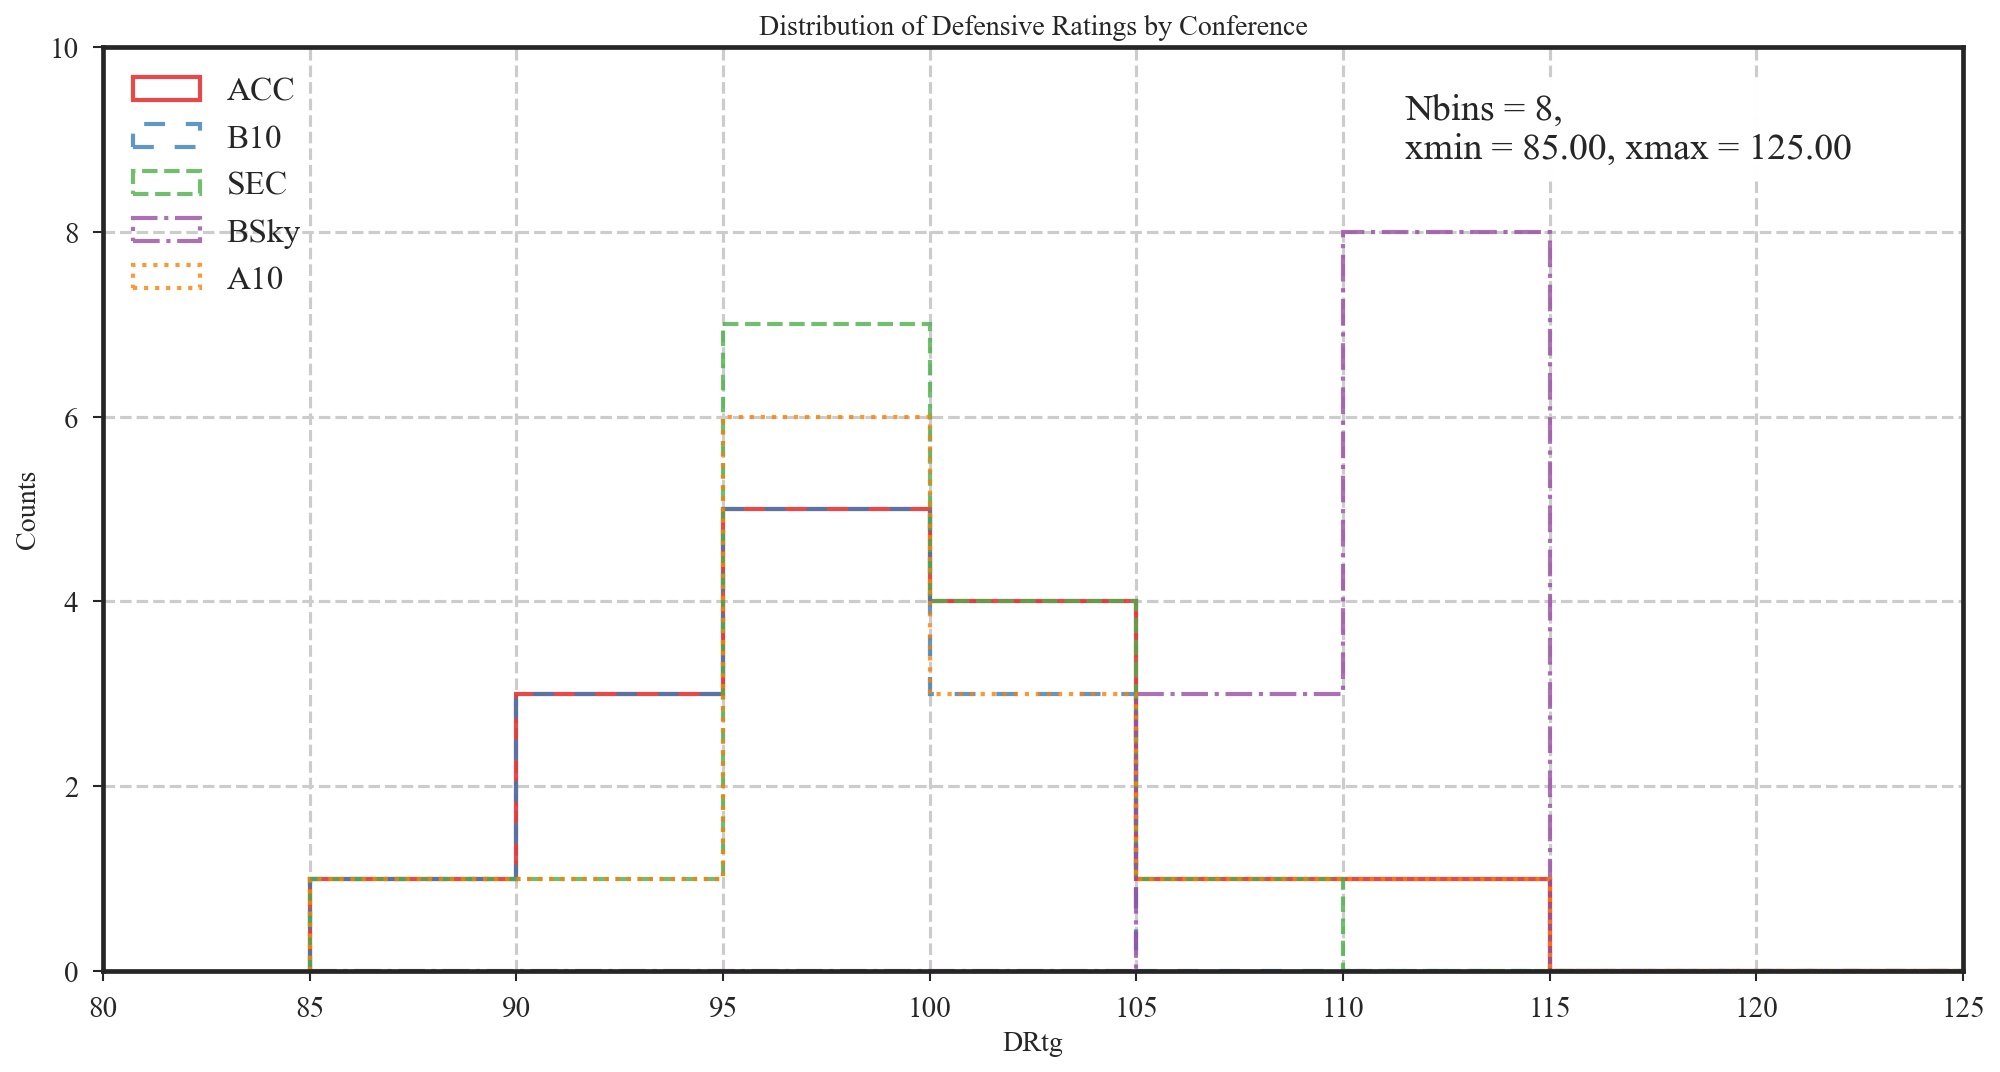

In [447]:
Nbins = 8
xmin = 85
xmax = 125
acc_counts, acc_bin_edges, acc_sy, ax = histogram_plot(ACC['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle='-',label='ACC')
b10_counts, b10_bin_edges, b10_sy, ax = histogram_plot(B10['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle=(0, (5, 5)), label='B10', join=True, ax=ax)
sec_counts, sec_bin_edges, sec_sy, ax = histogram_plot(SEC['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle='--', label='SEC', join=True, ax=ax)

bsky_counts, bsky_bin_edges, bsky_sy, ax = histogram_plot(BSky['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle='-.', label='BSky', join=True, ax=ax)

a10_counts, a10_bin_edges, a10_sy, ax = histogram_plot(A10['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle=':', label='A10', join=True, ax=ax)



ax.set_ylim(0, 10)
ax.set_xlim(80, 125)
plt.legend(fontsize=16)
plt.show()

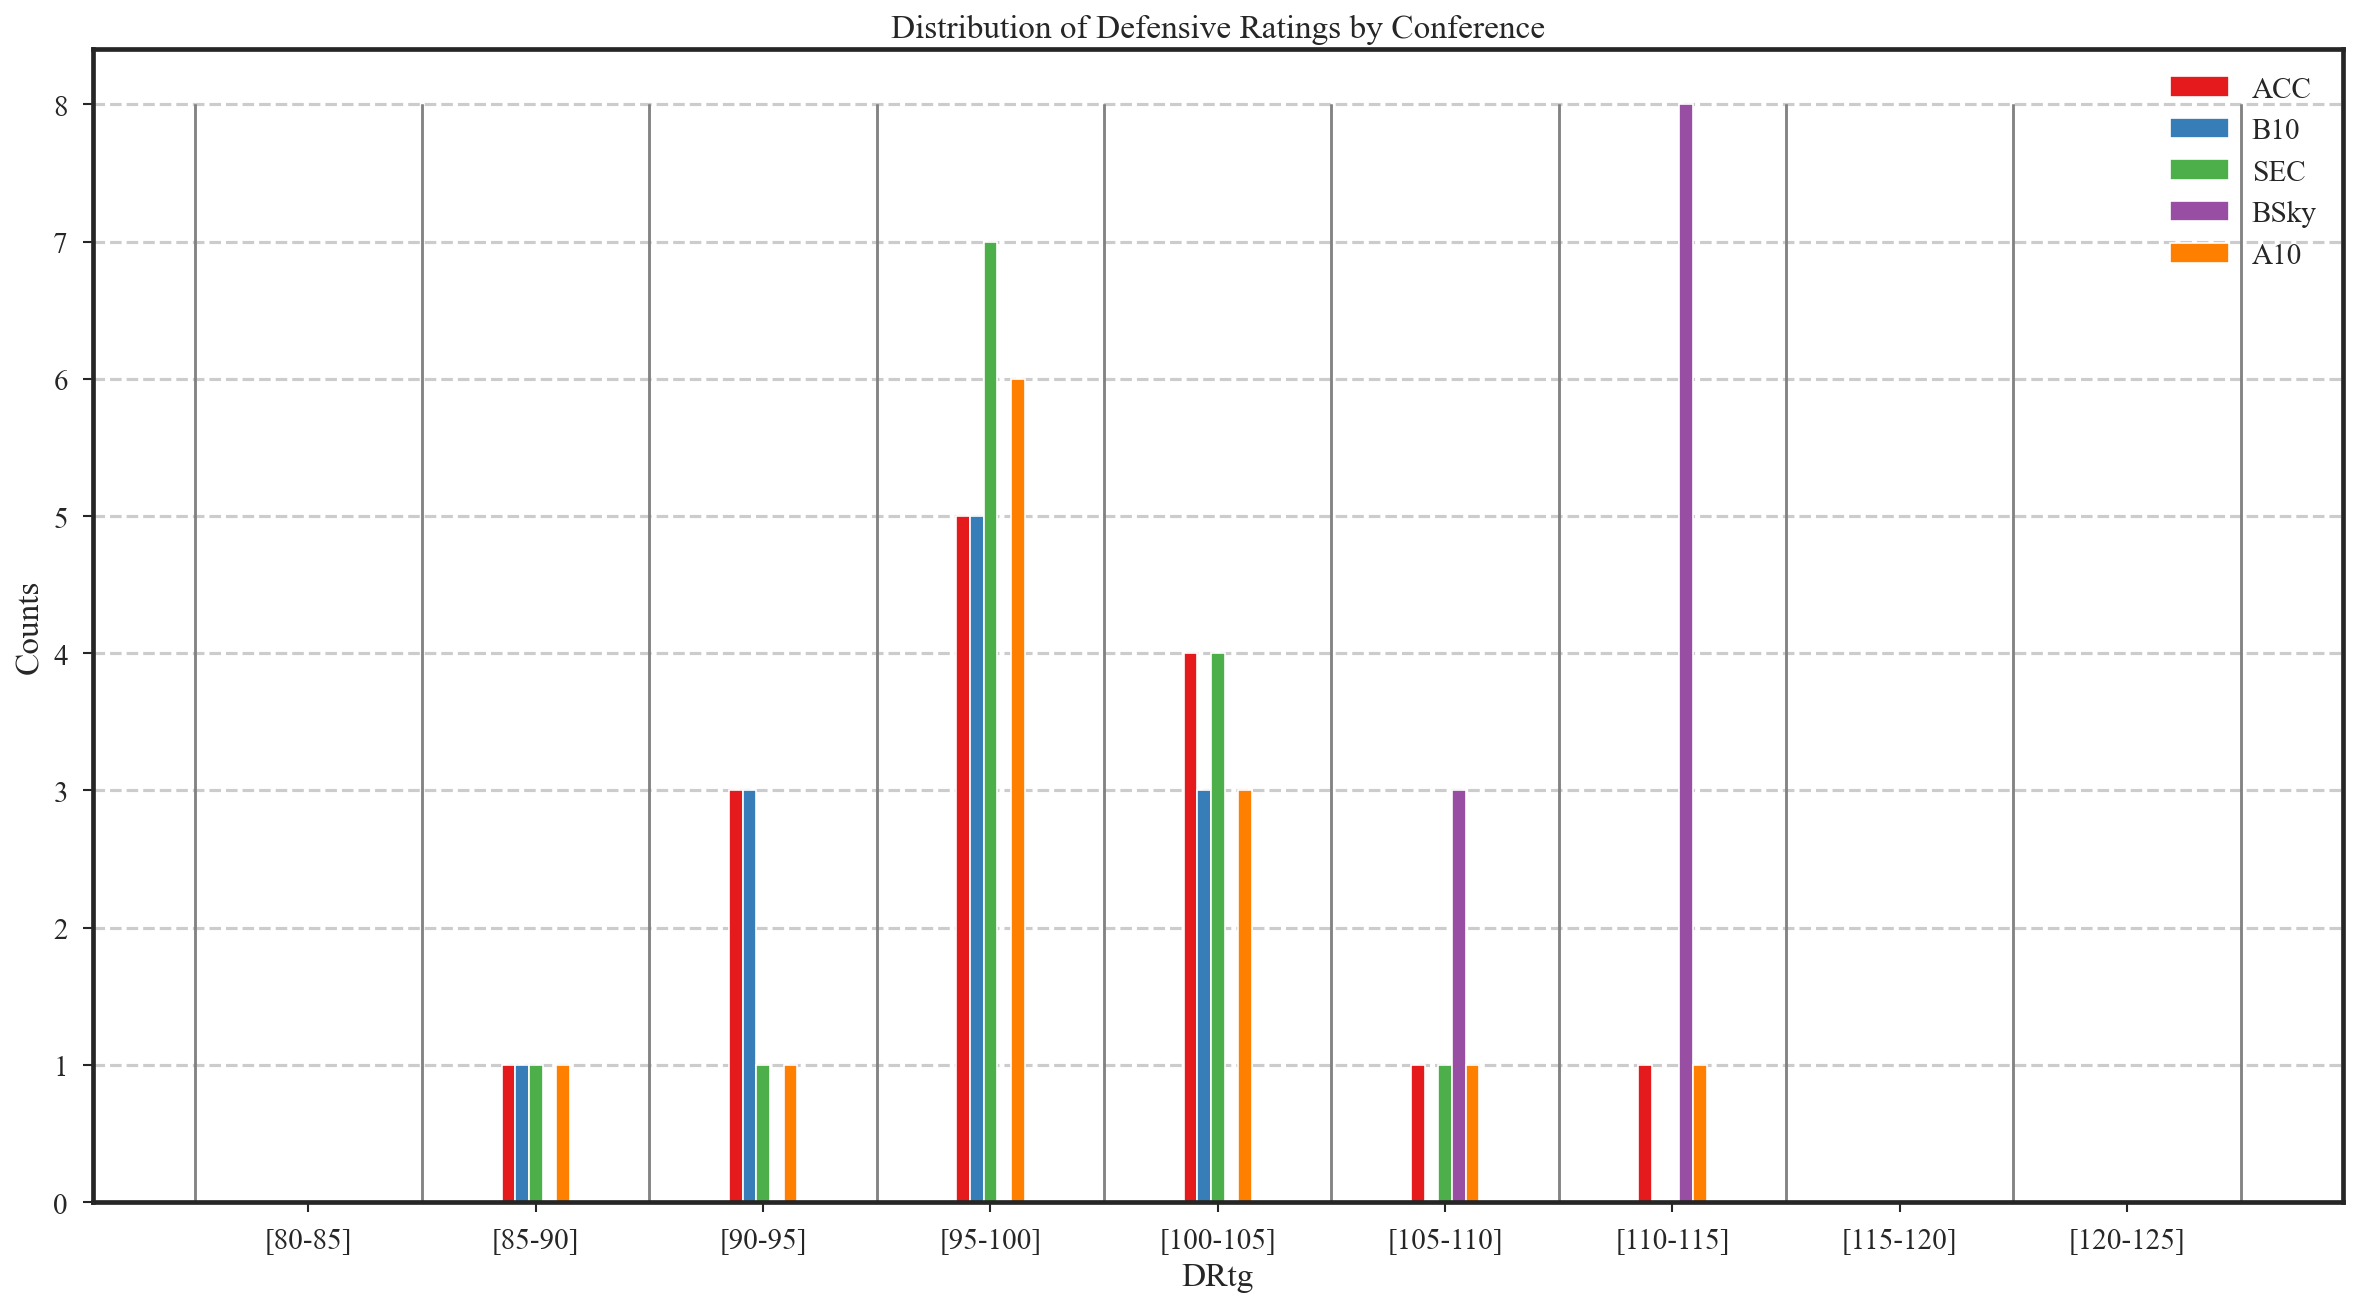

In [448]:
bins = np.arange(80, 130, 5)  # 80-85, 85-90, 90-95, etc.


fig, ax = plt.subplots(figsize=(16, 9))


bar_width = 0.3
conferences = ['ACC', 'B10', 'SEC', 'BSky', 'A10']
conf_data = [ACC['DRtg'], B10['DRtg'], SEC['DRtg'], BSky['DRtg'], A10['DRtg']]

# Plot bars for each conference
for i, (conf_name, data) in enumerate(zip(conferences, conf_data)):
    counts, _ = np.histogram(data, bins=bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    offset = (i - len(conferences)/2 + 0.5) * bar_width
    ax.bar(bin_centers + offset, counts, width=bar_width, label=conf_name)
    ax.vlines(bins, 0, 8, colors='gray', alpha=0.5)

ax.set_xlabel('DRtg', fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Distribution of Defensive Ratings by Conference', fontsize=16)

# Create interval labels for xticks
bin_centers = (bins[:-1] + bins[1:]) / 2
interval_labels = [f'[{int(bins[i])}-{int(bins[i+1])}]' for i in range(len(bins)-1)]
ax.set_xticks(bin_centers)
ax.set_xticklabels(interval_labels)

ax.legend(fontsize=14)
#ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x')
plt.tight_layout()
plt.show()

In [449]:
url = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2026/data/2009KenPomeroy.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table")
rows = table.find_all("tr")[1:]


In [450]:
teams = []
conf = []
DRtg = []
ORtg = []
number=[]

for row in rows:
    cells = row.find_all("td")
    if len(cells)>7:
        number.append(cells[0].get_text(strip=True))
        teams.append(cells[1].get_text(strip=True))
        conf.append(cells[2].get_text(strip=True))
        DRtg.append(float(cells[7].get_text(strip=True)))
        ORtg.append(float(cells[5].get_text(strip=True)))


df_2009 = pd.DataFrame({
    'rank': number,
    'team': teams,
    'conference': conf,
    'DRtg': DRtg,
    'ORtg': ORtg
})

In [451]:
df['team'] = df['team'].str.replace(r'\d+$', '', regex=True)
df_2009['team'] = df_2009['team'].str.replace(r'\d+$', '', regex=True)

In [469]:
print(len(df[df['conference']=='ACC']))
print(len(df_2009[df_2009['conference']=='ACC']))

15
12


In [452]:
ACC = df[df['conference']=='ACC']
SEC = df[df['conference']=='SEC']
B10 = df[df['conference']=='B10']
BSky = df[df['conference']=='BSky']
A10 = df[df['conference']=='A10']
rest = df[~df['conference'].isin(['ACC', 'SEC', 'B10', 'BSky', 'A10'])]

ACC_2009 = df_2009[df_2009['conference']=='ACC']
SEC_2009 = df_2009[df_2009['conference']=='SEC']
B10_2009 = df_2009[df_2009['conference']=='B10']
BSky_2009 = df_2009[df_2009['conference']=='BSky']
A10_2009 = df_2009[df_2009['conference']=='A10']
rest_2009 = df_2009[~df_2009['conference'].isin(['ACC', 'SEC', 'B10', 'BSky', 'A10'])]

In [472]:
print(len(ACC_2009), len(SEC_2009), len(B10_2009), len(BSky_2009), len(A10_2009), len(rest_2009))
print(len(ACC), len(SEC), len(B10), len(BSky), len(A10), len(rest))


12 12 11 9 14 270
15 14 12 11 13 276


In [471]:
ACC_only_in_2014 = ACC[~ACC['team'].isin(ACC_2009['team'])]
print(ACC_only_in_2014[['team', 'conference', 'ORtg', 'DRtg']])


          team conference   ORtg   DRtg
15  Pittsburgh        ACC  116.9   95.0
17    Syracuse        ACC  114.6   93.0
95  Notre Dame        ACC  113.5  105.8


In [454]:
ACC_merged = pd.merge(ACC, ACC_2009, on='team', suffixes=('_2014', '_2009'))
SEC_merged = pd.merge(SEC, SEC_2009, on='team', suffixes=('_2014', '_2009'))
B10_merged = pd.merge(B10, B10_2009, on='team', suffixes=('_2014', '_2009'))
BSky_merged = pd.merge(BSky, BSky_2009, on='team', suffixes=('_2014', '_2009'))
A10_merged = pd.merge(A10, A10_2009, on='team', suffixes=('_2014', '_2009'))
rest_merged = pd.merge(rest, rest_2009, on='team', suffixes=('_2014', '_2009'))

ACC_merged['ORTG_change'] = ACC_merged['ORtg_2014'] - ACC_merged['ORtg_2009']
SEC_merged['ORTG_change'] = SEC_merged['ORtg_2014'] - SEC_merged['ORtg_2009']
B10_merged['ORTG_change'] = B10_merged['ORtg_2014'] - B10_merged['ORtg_2009']
BSky_merged['ORTG_change'] = BSky_merged['ORtg_2014'] - BSky_merged['ORtg_2009']
A10_merged['ORTG_change'] = A10_merged['ORtg_2014'] - A10_merged['ORtg_2009']
rest_merged['ORTG_change'] = rest_merged['ORtg_2014'] - rest_merged['ORtg_2009']


full_df = pd.merge(df, df_2009, on='team', suffixes=('_2014', '_2009'))


In [466]:

teams_only_in_2014 = rest[~rest['team'].isin(rest_merged['team'])]


teams_only_in_2014[['team', 'conference', 'ORtg', 'DRtg']]

teams_only_in_2009 = rest_2009[~rest_2009['team'].isin(rest_merged['team'])]
teams_only_in_2009[['team', 'conference', 'ORtg', 'DRtg']]
print(len(teams_only_in_2014), len(teams_only_in_2009))


16 10


In [465]:
print(len(ACC_merged['team']), len(ACC['team']), len(ACC_2009['team']))
print(len(ACC_merged['team']) + len(SEC_merged['team']) + len(B10_merged['team']) + len(BSky_merged['team']) + len(A10_merged['team']))


12 15 12
55


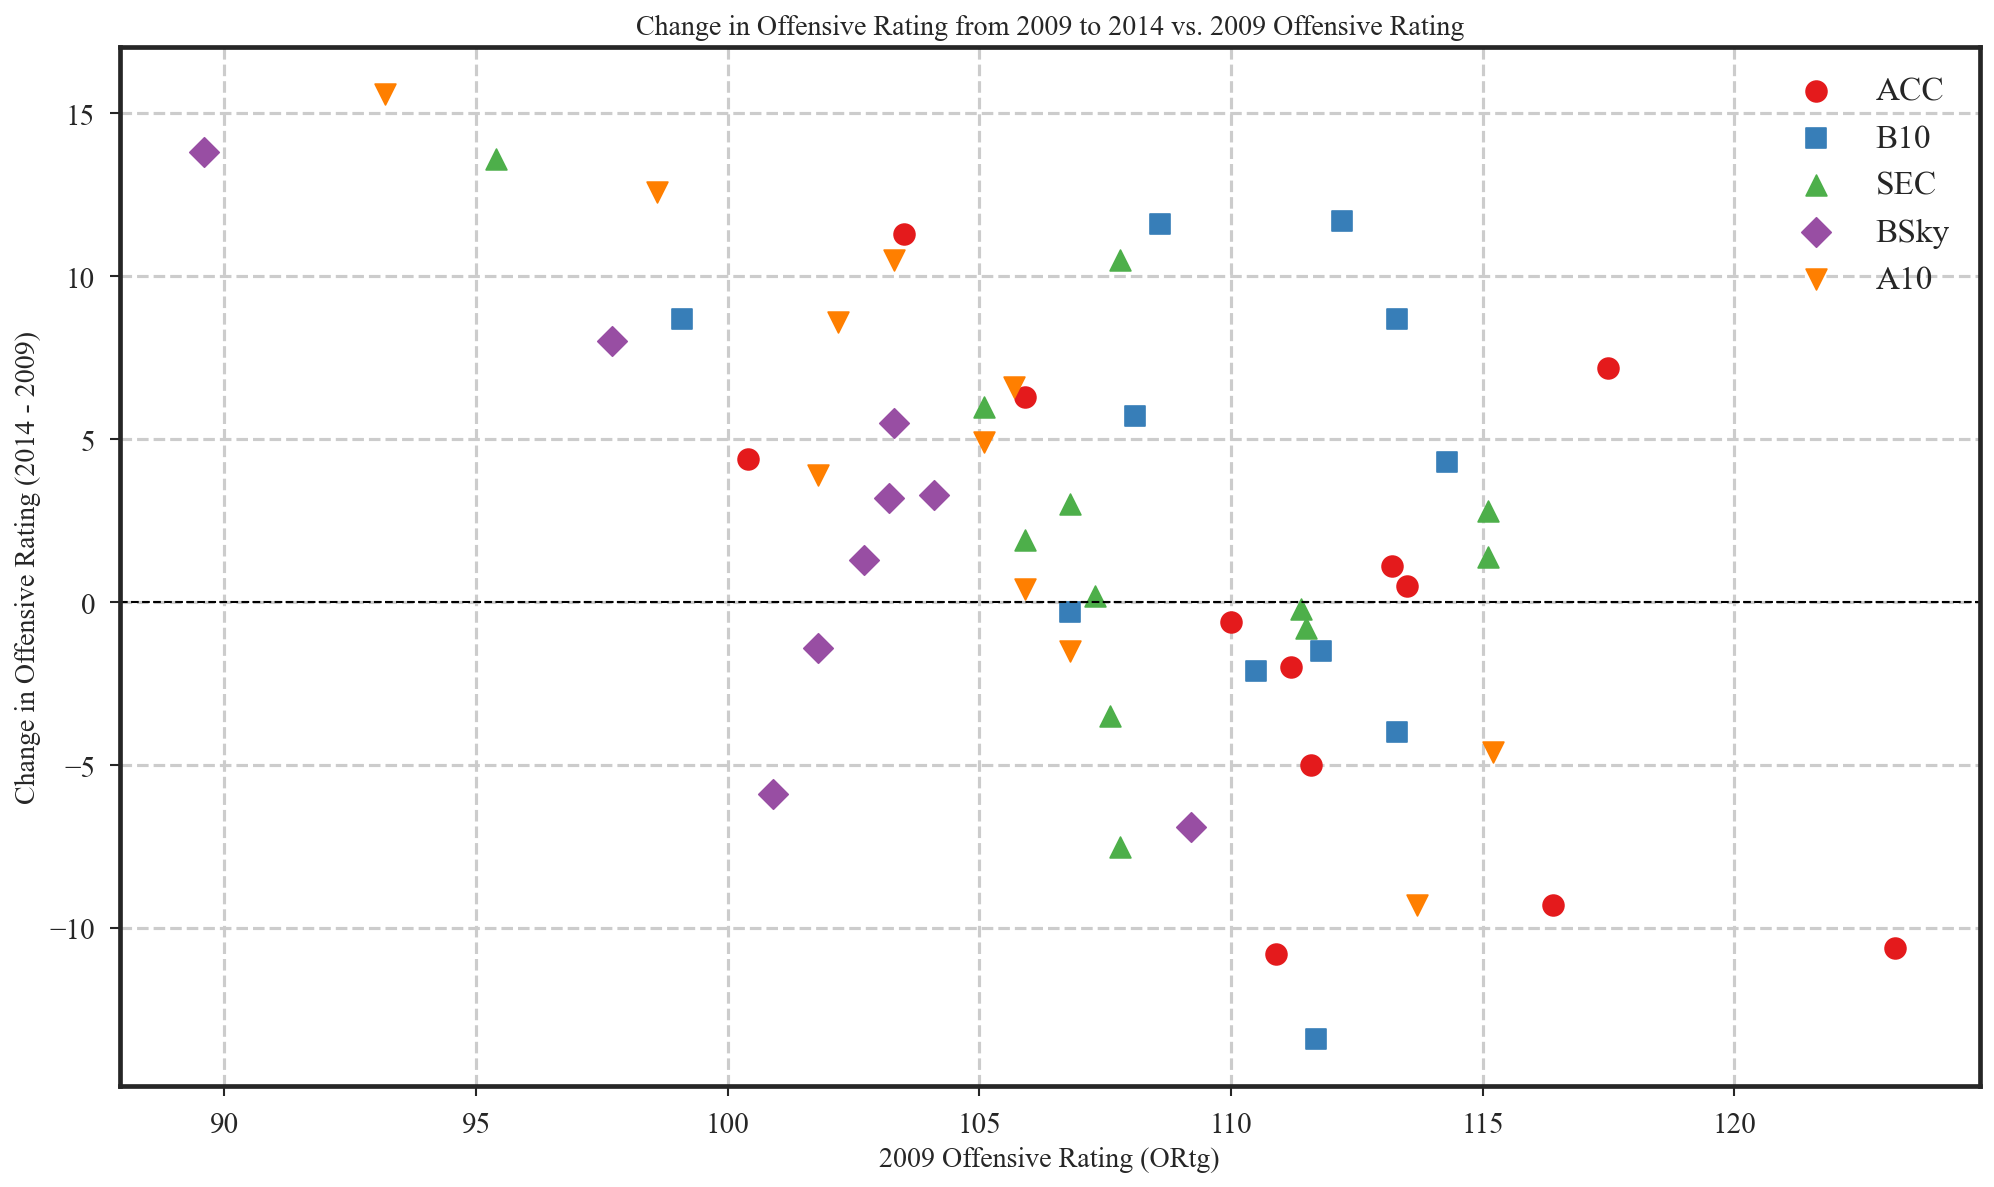

In [457]:
fig, ax = plt.subplots(figsize=(16, 9))

markers = {
    'ACC': 'o',
    'B10': 's',
    'SEC': '^',
    'BSky': 'D',
    'A10': 'v'
}

ax.scatter(ACC_merged['ORtg_2009'], ACC_merged['ORTG_change'], label='ACC', s=100, marker=markers['ACC'])
ax.scatter(B10_merged['ORtg_2009'], B10_merged['ORTG_change'], label='B10', s=100, marker=markers['B10'])
ax.scatter(SEC_merged['ORtg_2009'], SEC_merged['ORTG_change'], label='SEC', s=100, marker=markers['SEC'])
ax.scatter(BSky_merged['ORtg_2009'], BSky_merged['ORTG_change'], label='BSky', s=100, marker=markers['BSky'])
ax.scatter(A10_merged['ORtg_2009'], A10_merged['ORTG_change'], label='A10', s=100, marker=markers['A10'])

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('2009 Offensive Rating (ORtg)')
ax.set_ylabel('Change in Offensive Rating (2014 - 2009)')
ax.set_title('Change in Offensive Rating from 2009 to 2014 vs. 2009 Offensive Rating')
ax.legend(fontsize=16)
plt.show()


In [458]:
means = np.array([ACC_merged['ORTG_change'].mean(), B10_merged['ORTG_change'].mean(), SEC_merged['ORTG_change'].mean(), BSky_merged['ORTG_change'].mean(), A10_merged['ORTG_change'].mean(), rest_merged['ORTG_change'].mean()])
medians = np.array([ACC_merged['ORTG_change'].median(), B10_merged['ORTG_change'].median(), SEC_merged['ORTG_change'].median(), BSky_merged['ORTG_change'].median(), A10_merged['ORTG_change'].median(), rest_merged['ORTG_change'].median()])
conferences = ['ACC', 'B10', 'SEC', 'BSky', 'A10', 'Rest']
df_stats = pd.DataFrame({'Conference': conferences, 'Mean_ORTG_change': means, 'Median_ORTG_change': medians})
print(df_stats.to_latex())

\begin{tabular}{llrr}
\toprule
 & Conference & Mean_ORTG_change & Median_ORTG_change \\
\midrule
0 & ACC & -0.625000 & -0.050000 \\
1 & B10 & 2.672727 & 4.300000 \\
2 & SEC & 2.283333 & 1.650000 \\
3 & BSky & 2.322222 & 3.200000 \\
4 & A10 & 4.336364 & 4.900000 \\
5 & Rest & 2.595273 & 1.900000 \\
\bottomrule
\end{tabular}



In [459]:
#repeating including the conference BE:

BE = df[df['conference']=='BE']
BE_2009 = df_2009[df_2009['conference']=='BE']
BE_merged = pd.merge(BE, BE_2009, on='team', suffixes=('_2014', '_2009'))
BE_merged['ORTG_change'] = BE_merged['ORtg_2014'] - BE_merged['ORtg_2009']
rest = df[~df['conference'].isin(['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE'])]
rest_2009 = df_2009[~df_2009['conference'].isin(['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE'])]
rest_merged = pd.merge(rest, rest_2009, on='team', suffixes=('_2014', '_2009'))
rest_merged['ORTG_change'] = rest_merged['ORtg_2014'] - rest_merged['ORtg_2009']


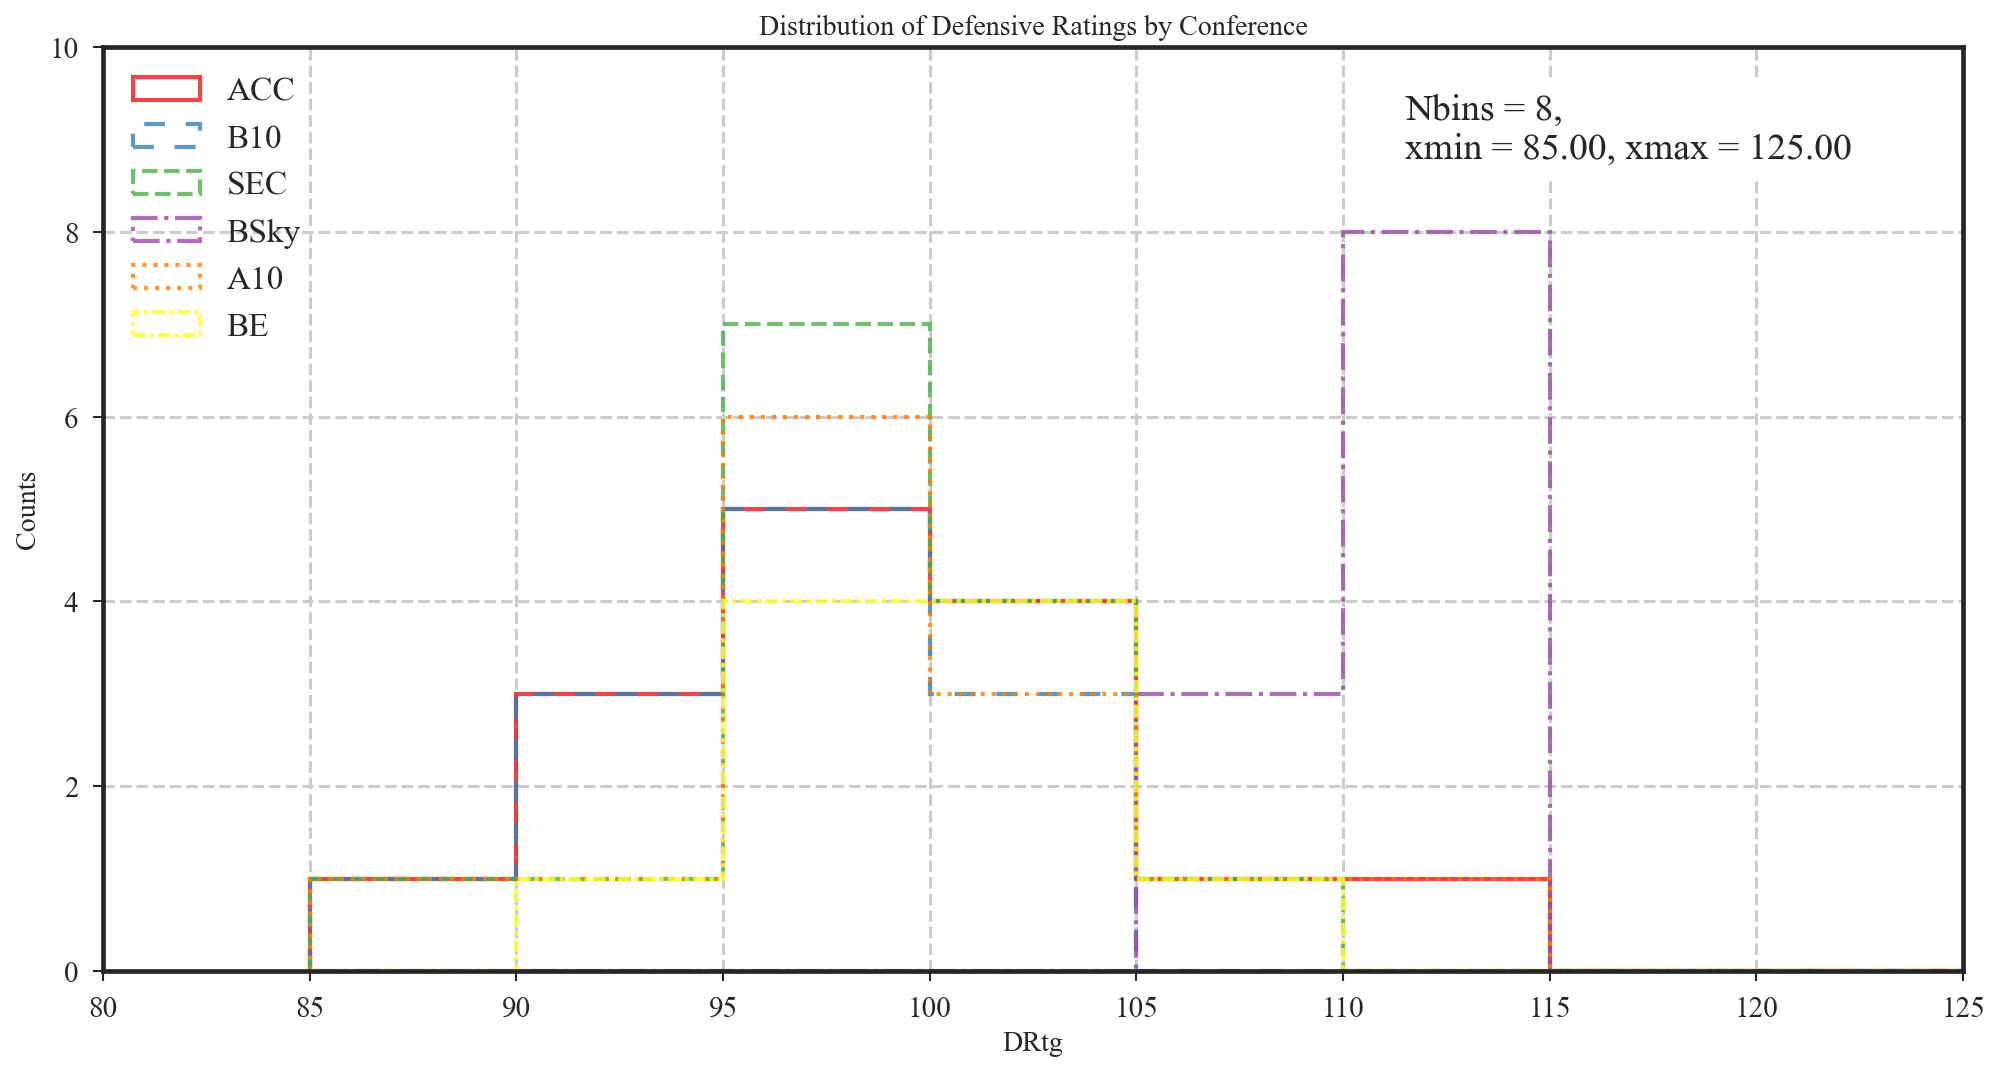

In [460]:
Nbins = 8
xmin = 85
xmax = 125
acc_counts, acc_bin_edges, acc_sy, ax = histogram_plot(ACC['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle='-',label='ACC')
b10_counts, b10_bin_edges, b10_sy, ax = histogram_plot(B10['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle=(0, (5, 5)), label='B10', join=True, ax=ax)
sec_counts, sec_bin_edges, sec_sy, ax = histogram_plot(SEC['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle='--', label='SEC', join=True, ax=ax)

bsky_counts, bsky_bin_edges, bsky_sy, ax = histogram_plot(BSky['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle='-.', label='BSky', join=True, ax=ax)

a10_counts, a10_bin_edges, a10_sy, ax = histogram_plot(A10['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle=':', label='A10', join=True, ax=ax)
BE_counts, BE_bin_edges, BE_sy, ax = histogram_plot(BE['DRtg'],Nbins=Nbins,xmin=xmin, xmax=xmax,xlabel='DRtg', ylabel='Counts', title='Distribution of Defensive Ratings by Conference', linestyle=(0, (3, 1, 1, 1)), label='BE', join=True, ax=ax)


ax.set_ylim(0, 10)
ax.set_xlim(80, 125)
plt.legend(fontsize=16)
plt.show()

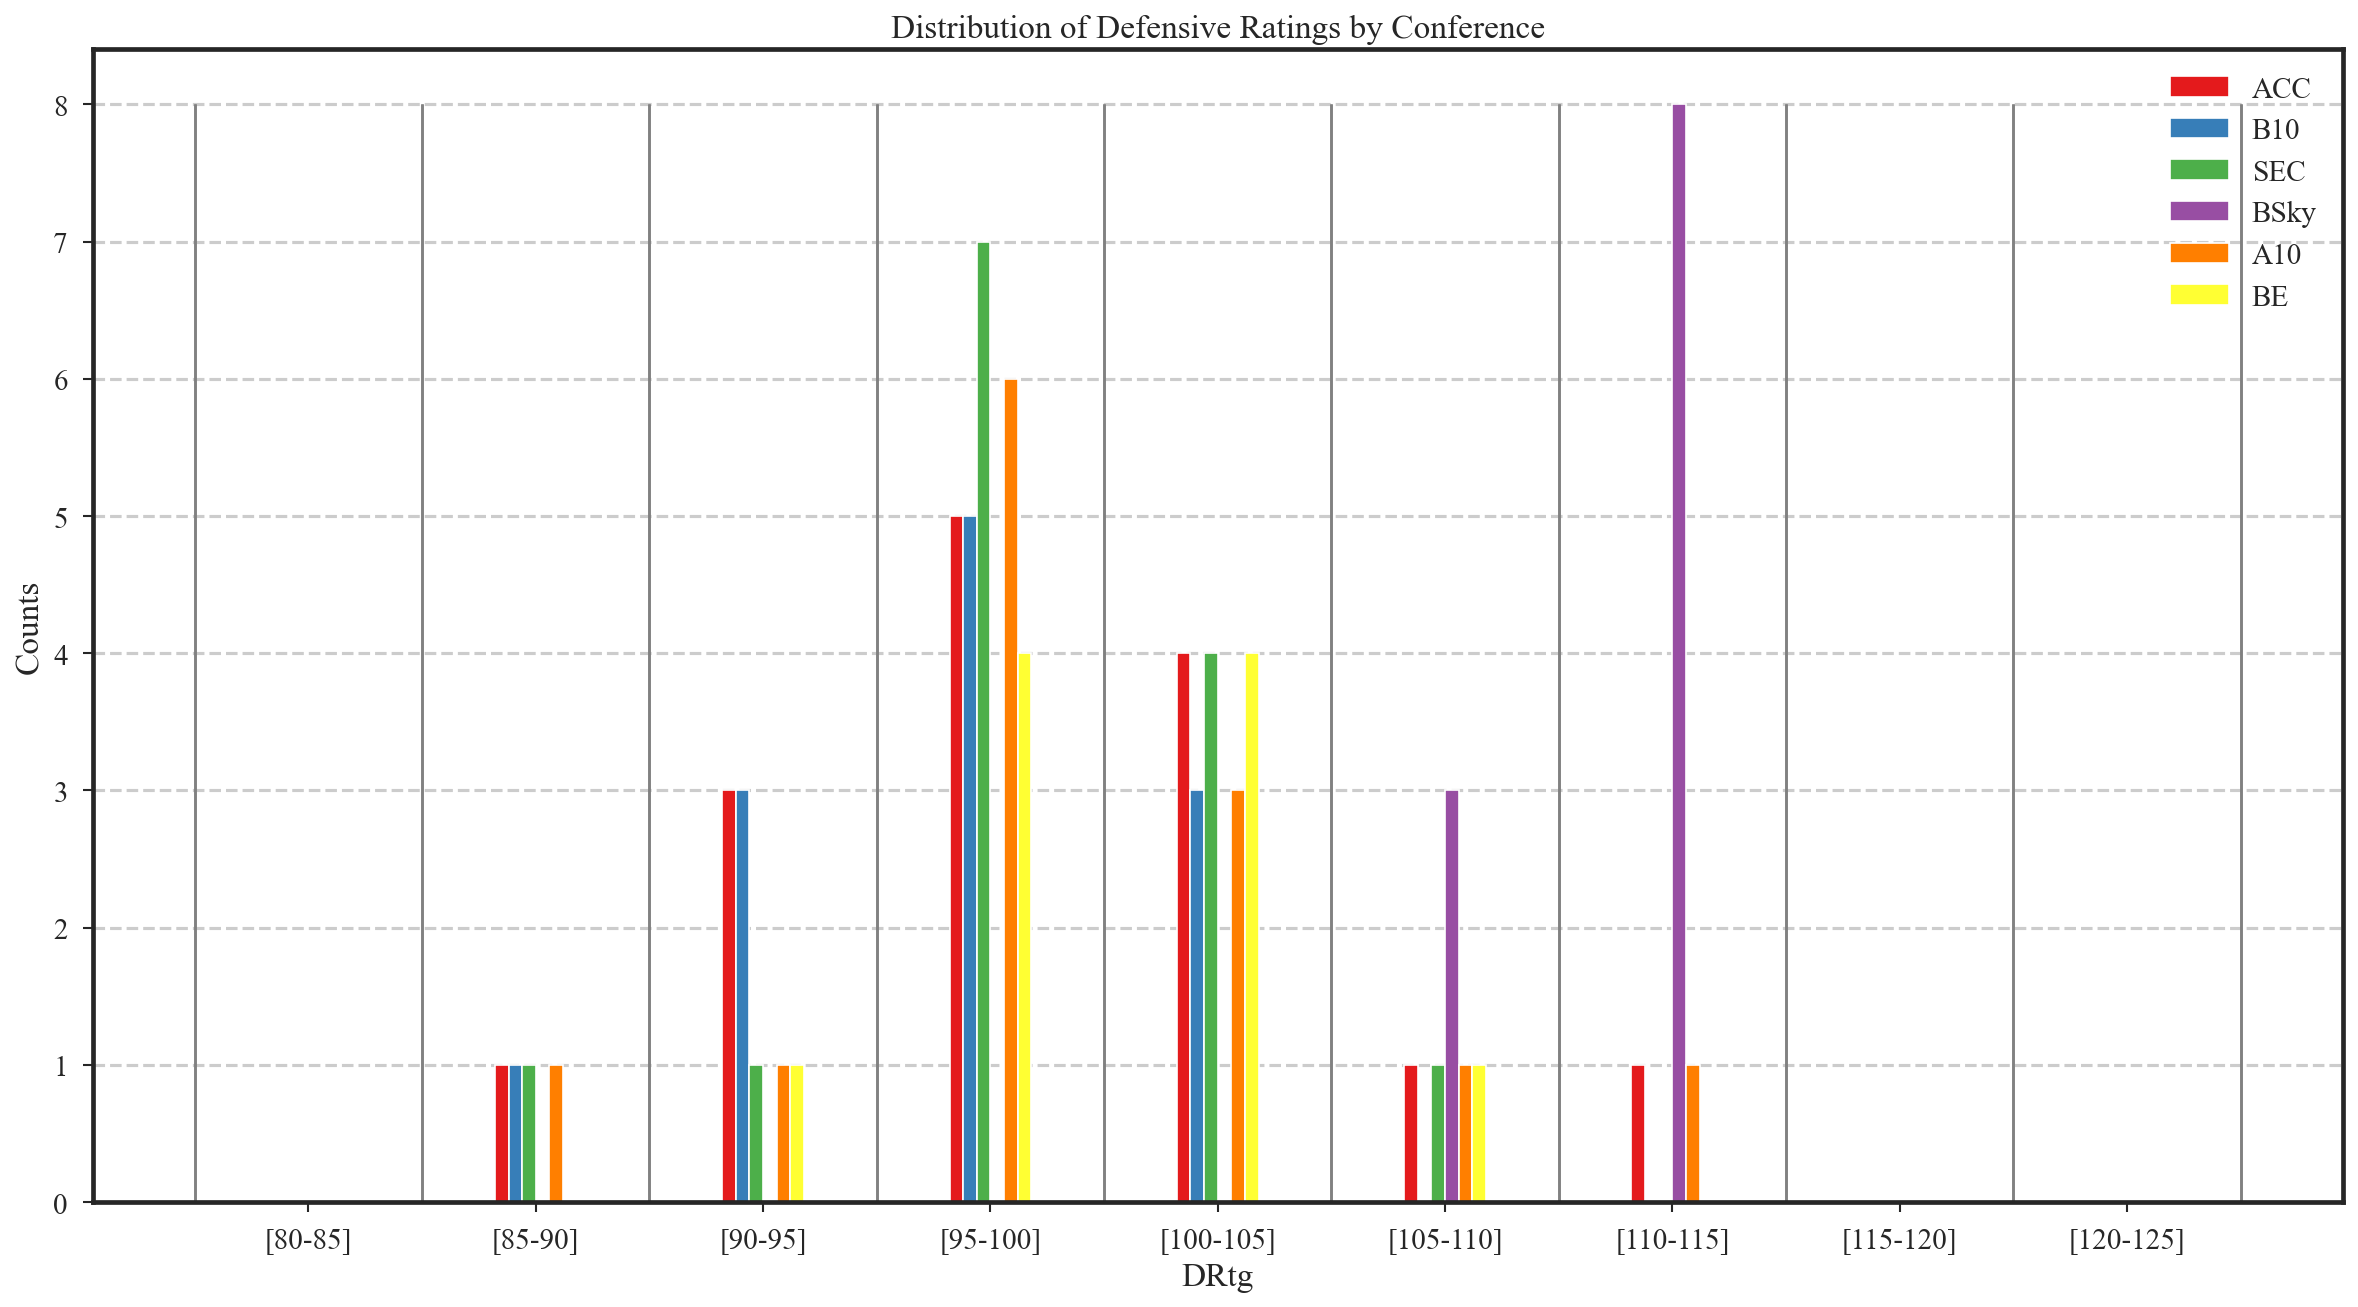

In [461]:
bins = np.arange(80, 130, 5)  # 80-85, 85-90, 90-95, etc.


fig, ax = plt.subplots(figsize=(16, 9))


bar_width = 0.3
conferences = ['ACC', 'B10', 'SEC', 'BSky', 'A10', 'BE']
conf_data = [ACC['DRtg'], B10['DRtg'], SEC['DRtg'], BSky['DRtg'], A10['DRtg'], BE['DRtg']]

# Plot bars for each conference
for i, (conf_name, data) in enumerate(zip(conferences, conf_data)):
    counts, _ = np.histogram(data, bins=bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    offset = (i - len(conferences)/2 + 0.5) * bar_width
    ax.bar(bin_centers + offset, counts, width=bar_width, label=conf_name)
    ax.vlines(bins, 0, 8, colors='gray', alpha=0.5)

ax.set_xlabel('DRtg', fontsize=16)
ax.set_ylabel('Counts', fontsize=16)
ax.set_title('Distribution of Defensive Ratings by Conference', fontsize=16)

# Create interval labels for xticks
bin_centers = (bins[:-1] + bins[1:]) / 2
interval_labels = [f'[{int(bins[i])}-{int(bins[i+1])}]' for i in range(len(bins)-1)]
ax.set_xticks(bin_centers)
ax.set_xticklabels(interval_labels)

ax.legend(fontsize=14)
#ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x')
plt.tight_layout()
plt.show()

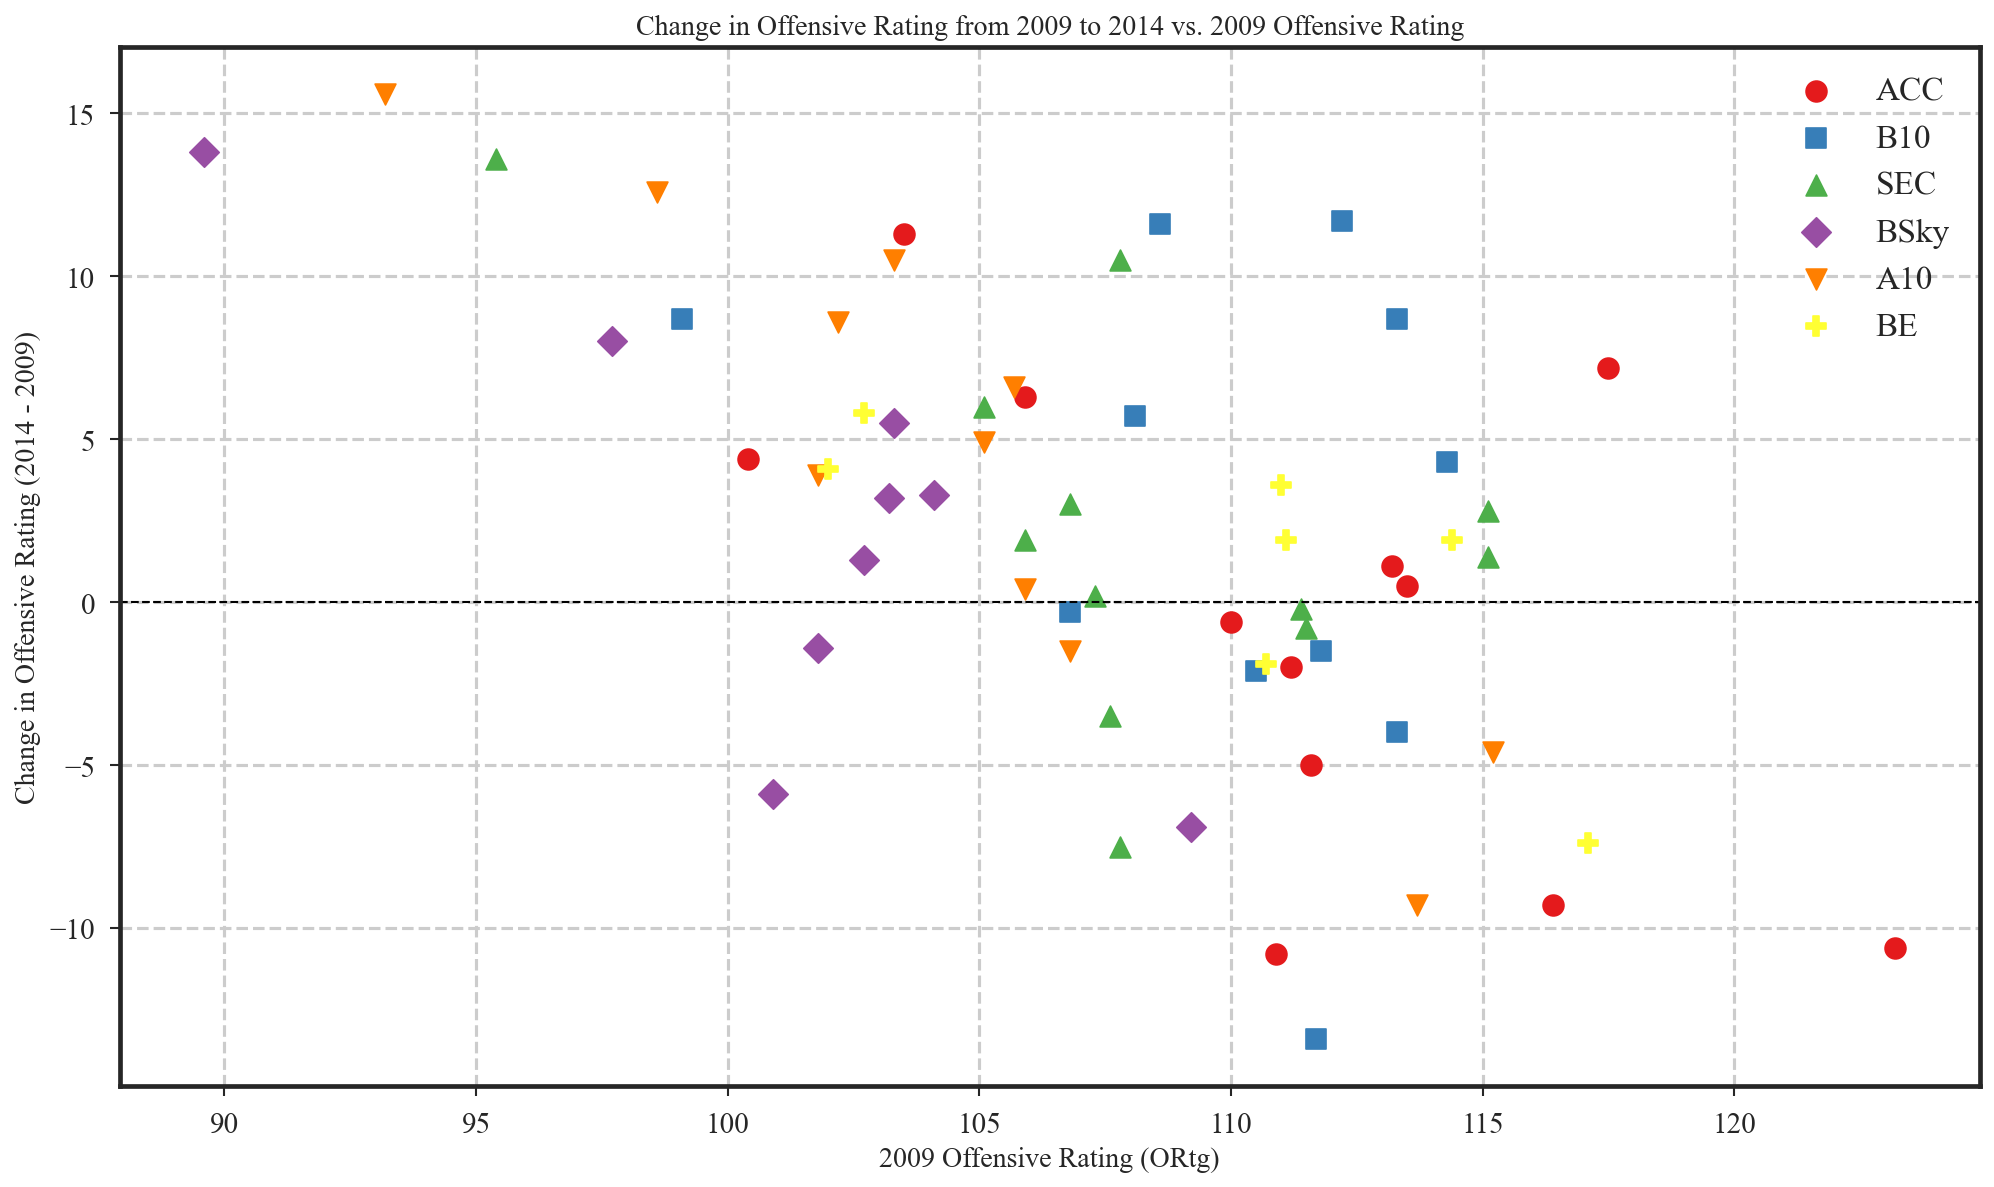

In [462]:
fig, ax = plt.subplots(figsize=(16, 9))

markers = {
    'ACC': 'o',
    'B10': 's',
    'SEC': '^',
    'BSky': 'D',
    'A10': 'v',
    'BE': 'P'
}

ax.scatter(ACC_merged['ORtg_2009'], ACC_merged['ORTG_change'], label='ACC', s=100, marker=markers['ACC'])
ax.scatter(B10_merged['ORtg_2009'], B10_merged['ORTG_change'], label='B10', s=100, marker=markers['B10'])
ax.scatter(SEC_merged['ORtg_2009'], SEC_merged['ORTG_change'], label='SEC', s=100, marker=markers['SEC'])
ax.scatter(BSky_merged['ORtg_2009'], BSky_merged['ORTG_change'], label='BSky', s=100, marker=markers['BSky'])
ax.scatter(A10_merged['ORtg_2009'], A10_merged['ORTG_change'], label='A10', s=100, marker=markers['A10'])
ax.scatter(BE_merged['ORtg_2009'], BE_merged['ORTG_change'], label='BE', s=100, marker=markers['BE'])

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('2009 Offensive Rating (ORtg)')
ax.set_ylabel('Change in Offensive Rating (2014 - 2009)')
ax.set_title('Change in Offensive Rating from 2009 to 2014 vs. 2009 Offensive Rating')
ax.legend(fontsize=16)
plt.show()

In [463]:
means = np.array([
    ACC_merged['ORTG_change'].mean(),
    B10_merged['ORTG_change'].mean(),
    SEC_merged['ORTG_change'].mean(),
    BSky_merged['ORTG_change'].mean(),
    A10_merged['ORTG_change'].mean(),
    BE_merged['ORTG_change'].mean(),
    rest_merged['ORTG_change'].mean()
])

medians = np.array([
    ACC_merged['ORTG_change'].median(),
    B10_merged['ORTG_change'].median(),
    SEC_merged['ORTG_change'].median(),
    BSky_merged['ORTG_change'].median(),
    A10_merged['ORTG_change'].median(),
    BE_merged['ORTG_change'].median(),
    rest_merged['ORTG_change'].median()
])

conferences = ['ACC', 'B10', 'SEC', 'BSky', 'A10', 'BE', 'Rest']

df_stats = pd.DataFrame({
    'Conference': conferences,
    'Mean_ORTG_change': means,
    'Median_ORTG_change': medians
})

print(df_stats.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
Conference & Mean_ORTG_change & Median_ORTG_change \\
\midrule
ACC & -0.625000 & -0.050000 \\
B10 & 2.672727 & 4.300000 \\
SEC & 2.283333 & 1.650000 \\
BSky & 2.322222 & 3.200000 \\
A10 & 4.336364 & 4.900000 \\
BE & 1.142857 & 1.900000 \\
Rest & 2.623846 & 1.850000 \\
\bottomrule
\end{tabular}

